
## Unsupervised learning
#### Homework 9 (last homework)
#### Due Thursday 12/8

In this assignment we will explore some of the unsupervised techniques we've learned in the last couple of weeks.  You are welcome to *incorporate* this work into your Project 2. In other words, work done here can also count toward Project 2. 

For each problem you will need a dataset.  It is fine if you use the same dataset for each exercise.  It is also fine to use your Project 2 dataset. If you need a dataset, you can select a dataset from UCI or Kaggle.

Unless otherwise stipulated it is fine to use `sklearn`. 

In a few questions I ask you to time something.  One way to do this is...

```python
import time
start = time.time()
clf.fit(X_train,y_train)
stop = time.time()
```

Now `stop-start` will tell you how long it took to train this model.

In [36]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR

## Problem 1 (PCA)

You can do the work for this problem in the python cells below, but please edit this cell to type your answers in right under the question prompts.

---

a) What is the explained variance ratio for each principal component when you do PCA on your dataset? (if you have a huge number of components then just the first 10)

b) How many components do you need to capture 90% of the explained variance? 

c) Produce a 2-dimensional visualization of your data using the first two principal components.

d) For those who paid close attention: What are the eigenvalues of the covariance matrix for your dataset? (You can find them with `sklearn` or manually with `numpy`).

e) Using a SVM (or SVR for regression):

    1) Fit your original untransformed dataset

        a) How long did the fit take?

        b) What accuracy/R2 score did you get?

    2) Do the same thing for the PCA projection of your data that captures 90% of the explained variance.
    
I suggest using the support vector machine because they are slow to train and there will probably be a noticeable difference in time.

## 1. variance explained ratio
    
9.98595583e-01, 1.16911547e-03, 2.34744428e-04, 5.55689873e-07,
4.60035457e-10, 3.66714266e-10, 2.89622329e-10, 1.87636928e-10,
9.98978661e-11, 4.77213505e-12, 4.44988478e-34
## 2. components
So it seems that this data set is pretty bad according to pca.The total variance ratio for the compnents does not add up to 90%
## 3.  visualization is below
The graph is not good either, where it seems linear instead of random.
## 4. lambda for pca1 and pca2
9.98595583e-01, 1.16911547e-03
pretty small values
## 5.  time and score
for untransformed, svr r2score = -0.026035898862341478 and time = 0.511760950088501
for pca, r2score = -0.026033934451796803 and time = 0.4224121570587158
the svr that trained on pca fit faster


In [30]:
## work cells
df = pd.read_csv("data.csv")
X = df.iloc[:,2 :13]
y = df["price"]
pca = PCA()
X_pca = pca.fit_transform(X)

In [31]:
pca.explained_variance_ratio_

array([9.98595583e-01, 1.16911547e-03, 2.34744428e-04, 5.55689873e-07,
       4.60035457e-10, 3.66714266e-10, 2.89622329e-10, 1.87636928e-10,
       9.98978661e-11, 4.77213505e-12, 4.44988478e-34])

In [32]:
pca.explained_variance_

array([1.28776906e+09, 1.50766813e+06, 3.02721759e+05, 7.16606641e+02,
       5.93252603e-01, 4.72907446e-01, 3.73491212e-01, 2.41972862e-01,
       1.28826307e-01, 6.15405074e-03, 5.73848317e-25])

In [33]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
df_pca['price'] = y

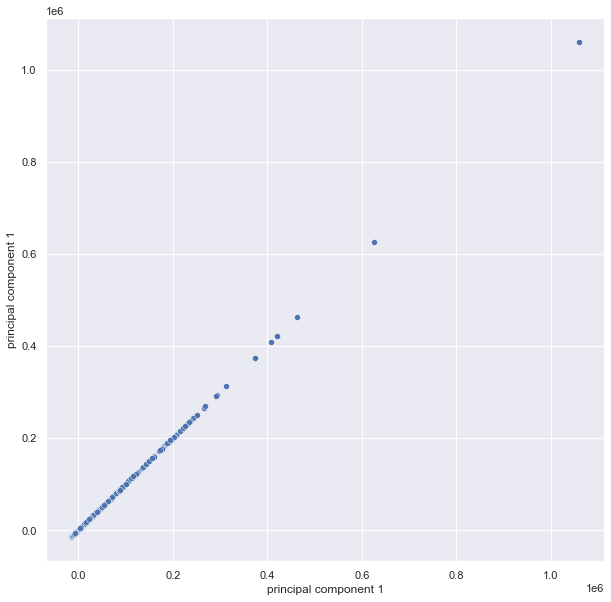

In [40]:
plt.figure(figsize = (10,10))
sns.scatterplot(data= df_pca,x = "principal component 1",y = "principal component 1")

In [45]:
start = time.time()
svr1 = SVR()
svr1.fit(X,y)
stop = time.time()

In [46]:
print("score",svr.score(X,y))

score -0.026035898862341478


In [47]:
stop-start

0.511760950088501

In [48]:
start = time.time()
svr2 = SVR()
svr2.fit(df_pca[["principal component 1","principal component 2"]],df_pca["price"])
stop = time.time()


In [49]:
svr2.score(df_pca[["principal component 1","principal component 2"]],df_pca["price"])

-0.026033934451796803

In [50]:
stop-start

0.4224121570587158

### Problem 2 (Clustering)

1) In the `sklearn` implementation of $k$-means clustering, there is a parameter called `init`.  This parameter determines how the centroids are initialized. If `init='random'` then centroids are initialized to be randomly selected datapoints.  If `init='k-means++'` then the initialization is done using the $k$-means++ algorithm discussed in class.

    a) time how long it takes to fit your data using $k=4$ clusters under each choice of `init`. Is $k$-means++ faster to fit? 

    b) for each choice of `init`, print out the `inertia` of the eventual fit. Is there a difference?

2) Use the elbow method (with a visual) to determine a good choice of $k$ for your dataset.

3) Use the silhouette method to determine a good choice of $k$ for your dataset.

4) Use [DBScan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to fit your data with default values for $\epsilon$ and `min_samples`. 

    a) How many clusters did DBScan find?
    b) Print out any outliers that DBScan found (datapoints assigned to no cluster).

---

5) (BONUS 5 midterm points) In this exercise we will compare the DBScan outliers to the result of $k$-means clustering.

    a) For each datapoint, compute the squared distance from the datapoint to the closest centroid found by $k$-means.

    b) For one (or more) DBScan outliers, compute the percentile score of this outlier in the distribution resulting from (a). 

Is it the case that DBScan outliers have extreme percentile scores with respect to centroid distance under $k$-means?

If DBScan is not giving you any outliers, try reducing $\epsilon$ until you get some.



## 1.
(a)kmeans++ was a bit faster than random.0.17312884330749512 vs 0.1770470142364502
(b)kmeans++ inertia was a bit smaller than random
## 2.
based on the graph, two clusters are good enough
## 3. 
one cluster had a high coefficient
## 4.
11 clusters found

In [51]:
from sklearn.cluster import KMeans
df = pd.read_csv("data.csv")
X = df.iloc[:,2 :13] 
d_kmeans = KMeans(n_clusters=4)
kmeans = KMeans(n_clusters=4,init = 'random')

In [52]:
start = time.time()
d_kmeans.fit(X)
stop = time.time()

In [53]:
stop-start

0.17312884330749512

In [54]:
start = time.time()
kmeans.fit(X)
stop = time.time()

In [55]:
stop-start

0.1770470142364502

In [57]:
d_kmeans.inertia_

724126884825.8799

In [58]:
kmeans.inertia_

764290934827.1105

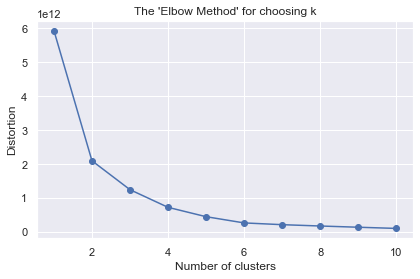

In [59]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.title("The 'Elbow Method' for choosing k")
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

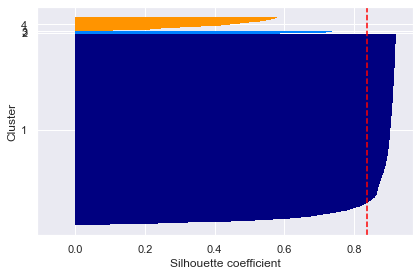

In [61]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

In [64]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN()
cl = clustering.fit(X)

In [66]:
cl.n_features_in_

11